# Бонусное задание 2: регрессия и корреляция

У вас на руках выгрузка данных из Базы World Bank Open Data. 

Мы скачали данные, которые в нашем представлении могли бы объяснить потенциальную длительность жизни в различных странах:
http://databank.worldbank.org/data/reports.aspx?source=world-development-indicators#

В данных вы найдете параметр Life expectancy  и ряд других показателей.  

Ваша задача: выяснить, какие из предложенных факторов оказывают значимое влияние на длительность жизни и могут служить хорошим предиктором для моделей предсказания длительности жизни. 

### Задание 1(1 балл)
Откройте данные и удалите строки, где есть пропущенные значения (dropna). Постройте гистограмму по переменной Life expectancy.

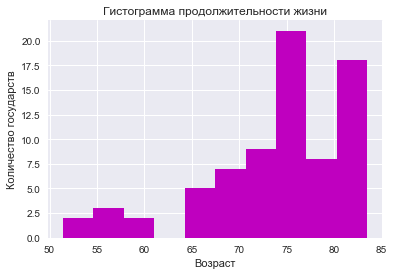

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### извлечение и обработка данных
path = 'DataLE.csv'
df = pd.read_csv(path)
df = df.dropna()
LE = df.Lifeexpectancy

### визуализация с помощью matplolib
# plt.boxplot(LE, 0, 'gD') #  ящик с усами!
plt.hist(LE, color='m')
plt.title("Гистограмма продолжительности жизни")
plt.xlabel("Возраст")
plt.ylabel("Количество государств")
plt.show()

### визуализация с помощью seaborn
# sns.set(style="whitegrid")
# sns.distplot(LE, kde=False, rug=True, hist=True, color="m")
# sns.set()

### Задание 2(1 балл) 
Отберите факторы, которые могут оказывать влияние на life expectancy. Подсказка: для этого нужно вспомнить с лекции, зачем строить матрицу корреляций (подсказка: dataset.corr()) для предикторов. И как их отбирать.
Опишите, почему и как Вы выбрали именно такие факторы.

In [97]:
# матрица корреляции
mtx_corr = df.corr()
LE_corr = mtx_corr.Lifeexpectancy

# сортируем коэффициенты корреляции 
res = LE_corr[LE_corr.abs() > 0.1][1:].sort_values(ascending=False)
res

Individuals_using_the_Internet     0.829774
GDP_per_capita                     0.659064
High-technology_exports            0.309918
GDP                                0.167480
Household_final_consumption        0.147844
Children_out_of_school_primary    -0.276942
Fertility_rate                    -0.830213
Name: Lifeexpectancy, dtype: float64

На продолжительность жизни могут оказывать влияние экономические, экологические и социальные причины. Методом исключения я отсеила все факторы, кроме - ВВП на душу населения и уровень рождаемости(косвенное влияние). При этом исключены также факторы, чей коэффициент корреляции близок к нулю. Фактор "доступ к интернету", несмотря на его высокий коэффициент корреляции, не имеет смысла учитывать при рассчете показателя средней продолжительности жизни.

In [101]:
# итого, параметры регрессии
X1 = df.Fertility_rate
X2 = df.GDP_per_capita

X_list = [X1, X2]

### Задание 3(1 балл)
Постройте регрессионную модель. Проинтерпретируйте полученные данные.

In [102]:
import statsmodels.api as sm

Y = LE
X = np.column_stack(X_list)
X = sm.add_constant(X)

# строим модель методом наименьших квадратов
ols_model = sm.OLS(Y, X)

# результаты
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:         Lifeexpectancy   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     153.3
Date:                Tue, 29 May 2018   Prob (F-statistic):           1.12e-26
Time:                        22:46:24   Log-Likelihood:                -193.16
No. Observations:                  75   AIC:                             392.3
Df Residuals:                      72   BIC:                             399.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         81.8657      1.124     72.858      0.0

### Интерпретация полученных результатов
    - Значение R^2 = 0.81
    - Y = -4.3245 * X1 + 0.0001 * X2 + 81.8657 - уравнение регрессии   

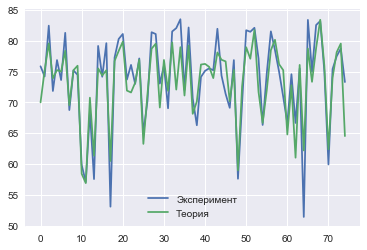

In [103]:
newY = -4.3245 * X1 + 0.0001 * X2 + 81.8657
t = [i for i in range(len(Y))]

plt.plot(t, Y, label='Эксперимент')
plt.plot(t, newY, label='Теория')
plt.legend()
plt.show()
# plt.savefig('image.png', bbox_inches='tight', dpi=500)

##### Полученные теоретические значения действительно близки к экспериментальным: на графике видно хорошее соответсвие эксперимента теории.